In [11]:
from pycaret.datasets import get_data
data = get_data('insurance')

# Experiment 1

In [5]:
from pycaret.regression import *

In [6]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [7]:
lr = create_model('lr')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:04:00
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4222.9616,33775764.3432,5811.6920,0.7983,0.4879,0.4328
1,4522.5819,43620030.5192,6604.5462,0.7464,0.5473,0.4216
2,3853.0378,31981107.9602,5655.1842,0.5951,0.7108,0.4398
3,3707.7705,26513348.5760,5149.1114,0.7786,0.4891,0.5164
4,4484.2122,43828444.1000,6620.3054,0.6740,0.5761,0.3847
5,4113.6222,35882341.9810,5990.1871,0.7692,0.5464,0.4130
6,4098.0868,39631320.0598,6295.3411,0.7303,0.5745,0.4266
7,4833.7747,45739275.7172,6763.0818,0.7485,0.5887,0.3967
8,4621.0616,40681916.3737,6378.2377,0.7372,0.7032,0.5225


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

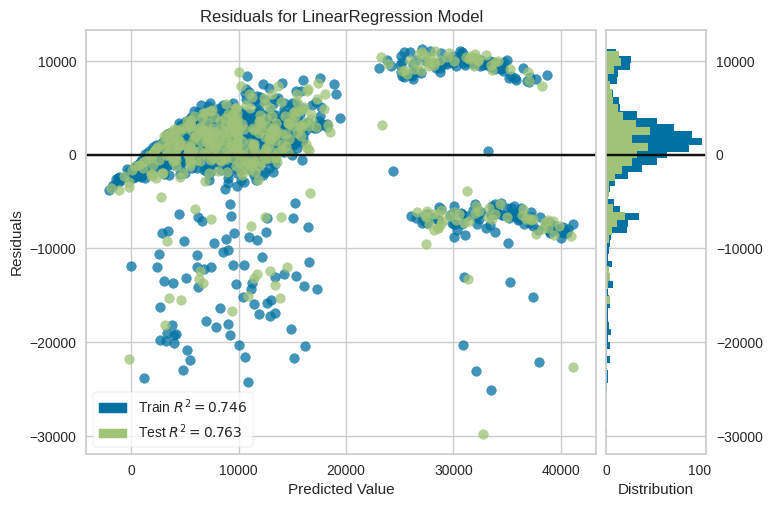

In [8]:
plot_model(lr)

# Experiment 2

In [11]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 55)"
5,Transformed train set shape,"(936, 55)"
6,Transformed test set shape,"(402, 55)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [14]:
#s2[0].columns

In [15]:
lr = create_model('lr')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:07:17
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3039.4834,21720538.0415,4660.5298,0.8703,0.3966,0.3151
1,3384.9172,32895844.4884,5735.4899,0.8087,0.4432,0.3082
2,3085.9146,23191634.3786,4815.7693,0.7064,0.5065,0.3836
3,2944.0438,20569024.3598,4535.3086,0.8282,0.4448,0.3817
4,3163.5142,28166408.2597,5307.2034,0.7905,0.5133,0.3002
5,3146.4447,24209650.8968,4920.3304,0.8443,0.4059,0.3014
6,2762.1017,21830370.9892,4672.2983,0.8515,0.3875,0.3106
7,3406.5298,29802602.8213,5459.1760,0.8361,0.4530,0.2911
8,3281.2473,25200979.1710,5020.0577,0.8372,0.4162,0.3575


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

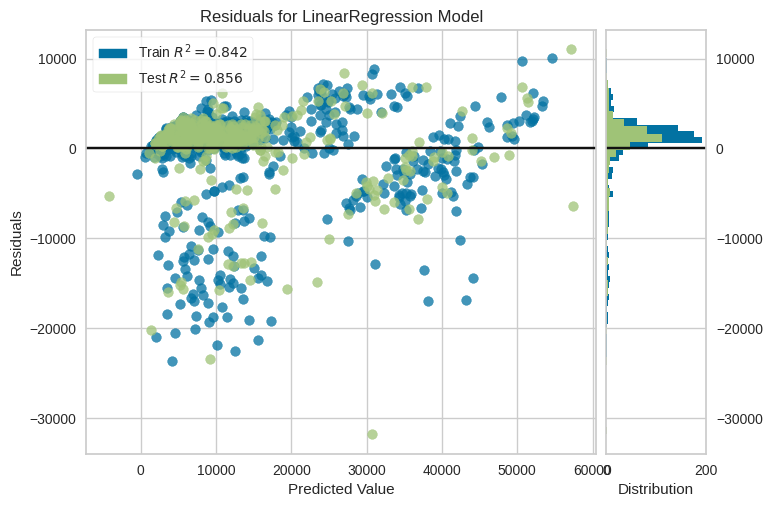

In [16]:
plot_model(lr)

In [17]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker...
                                                               use_cat_names=True))),
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['age', 'bmi'],
                                     transformer=KBinsDiscretizer(encode='ordinal',
                                                       

In [18]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded


In [19]:
deployment_28042020

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker...
                                                              use_cat_names=True))),
                ('polynomial_features',
                 TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                ('bin_numeric_features',
                 TransformerWrapper(include=['age', 'bmi'],
                                    transformer=KBinsDiscretizer(encode='ordinal',
                                                                 strategy='kmeans'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model', LinearRegression(n_jobs=-1))])

In [21]:
import requests
#url = 'https://pycaret-insurance.herokuapp.com/predict_api'
#pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
#print(pred.json())

In [22]:
def predict(model, input_df):
    predictions_df = predict_model(estimator=model, data=input_df)
    predictions = predictions_df['Label'][0]
    return predictions

In [3]:
from pycaret.regression import *
import pandas as pd
model = load_model('deployment_28042020')

#input_dict = {'age' : age, 'sex' : sex, 'bmi' : bmi, 'children' : children, 'smoker' : smoker, 'region' : region}
input_df = pd.read_csv("insurance.csv")

#predict(model= model, input_df= input_df)
predictions_df = predict_model(estimator=model, data=input_df)

Transformation Pipeline and Model Successfully Loaded


In [4]:
predictions_df["prediction_label"][0]

23613.208199127643

In [8]:
prueba=input_df.sample(5)
prueba.to_csv("prueba.csv")

In [9]:
prueba

,age,sex,bmi,children,smoker,region,charges
288,59,female,36.765,1,yes,northeast,47896.79135
977,26,male,29.150,1,no,southeast,2902.90650
1189,23,female,28.000,0,no,southwest,13126.67745
454,32,male,46.530,2,no,southeast,4686.38870
946,42,male,35.800,2,no,southwest,7160.09400


In [16]:
data.iloc[454]

age                32
sex              male
bmi             46.53
children            2
smoker             no
region      southeast
charges     4686.3887
Name: 454, dtype: object